<a href="https://colab.research.google.com/github/Trangng320/Tri-Tue-Nhan-Tao/blob/main/Cuoi-ki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#liên kết ggdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/Food


/content/drive/MyDrive/Colab Notebooks/BTVN/Food


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh ảnh 
train_datagen=ImageDataGenerator(rescale=1/255, 
                                 shear_range=0.2, 
                                 zoom_range=0.2, 
                                 horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Train',
                                               target_size=(150,150), 
                                               batch_size=32, 
                                               class_mode='categorical')

Found 3008 images belonging to 10 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Validation',
                                             target_size=(150,150), 
                                             batch_size=32, 
                                             class_mode='categorical')

Found 94 images belonging to 10 classes.


In [ ]:
training_set.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [ ]:
validation.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
#Huấn luyện mô hình
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), 
# Mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), 
# Khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,
                  epochs=20,
                  batch_size=128,
                  verbose=1, 
                  validation_data=validation, 
                  callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/20
94/94 [==============================] - 801s 8s/step - loss: 2.4203 - accuracy: 0.1832 - val_loss: 2.0407 - val_accuracy: 0.2447
Epoch 2/20
94/94 [==============================] - 63s 675ms/step - loss: 1.9102 - accuracy: 0.3281 - val_loss: 1.8041 - val_accuracy: 0.3723
Epoch 3/20
94/94 [==============================] - 61s 651ms/step - loss: 1.7321 - accuracy: 0.3959 - val_loss: 1.5639 - val_accuracy: 0.4468
Epoch 4/20
94/94 [==============================] - 61s 647ms/step - loss: 1.6439 - accuracy: 0.4382 - val_loss: 1.4654 - val_accuracy: 0.5000
Epoch 5/20
94/94 [==============================] - 62s 657ms/step - loss: 1.4689 - accuracy: 0.5027 - val_loss: 1.2574 - val_accuracy: 0.5957
Epoch 6/20
94/94 [==============================] - 62s 656ms/step - loss: 1.3794 - accuracy: 0.5249 - val_loss: 1.1111 - val_accuracy: 0.5745
Epoch 7/20
94/94 [==============================] - 61s 643ms/step - loss: 1.2436 - accuracy: 0.5798 - val_loss: 0.9348 - val_accuracy: 0.7021
E

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.36152246594429016
Train Accuracy 0.8833111524581909


<function matplotlib.pyplot.show(*args, **kw)>

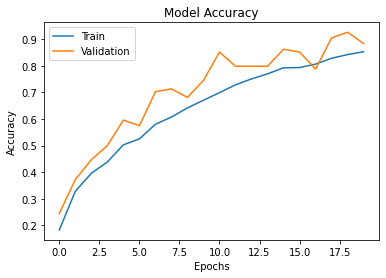

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Food.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('Food.h5')

1/1 [==============================] - 0s 327ms/step
('Banh cuon', STT                                                              1
Ten mon an                                               Banh cuon
Thanh phan                   Bot gao, thit heo, moc nhi, nam huong
Mui vi                             Co mui thom cua bot, mem va dai
Cach thuong thuc    Cham vao nuoc cham pha loang voi giam, ot, toi
Name: Banh cuon, dtype: object)


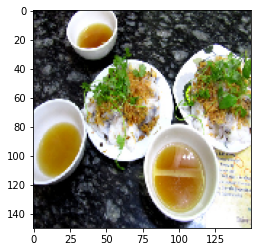

1/1 [==============================] - 0s 15ms/step
('Banh mi', STT                                                                 2
Ten mon an                                                    Banh mi
Thanh phan          Banh mi, nhan( thit heo, ga, bo, trung, ca,......
Mui vi               Vi thom beo cua cac loai nhan hoa quyen voi nhau
Cach thuong thuc     An kem voi nuoc sot rieng doi voi tung loai nhan
Name: Banh mi, dtype: object)


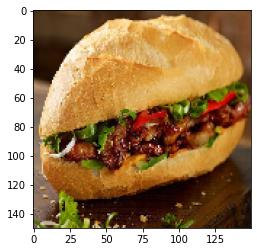

1/1 [==============================] - 0s 18ms/step
('Bun dau mam tom', STT                                                                 6
Ten mon an                                            Bun dau mam tom
Thanh phan          Bun, dau, cha com, mam tom, nem chua, thit luo...
Mui vi              Mui thom cua cac loai cha va nem, mem va beo c...
Cach thuong thuc       Cham voi mam tom duoc pha kem voi tac va duong
Name: Bun dau mam tom, dtype: object)


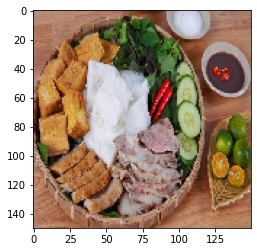

1/1 [==============================] - 0s 15ms/step
('Com tam', STT                                                       8
Ten mon an                                          Com tam
Thanh phan          Com, suon heo, bi heo, cha, trung op la
Mui vi              Mui vi hoa quyen cua cac loai do an kem
Cach thuong thuc         An kem voi nuoc mam toi ot pha keo
Name: Com tam, dtype: object)


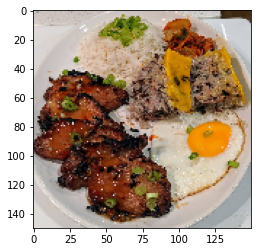

1/1 [==============================] - 0s 14ms/step
('Pho', STT                                                               10
Ten mon an                                                       Pho
Thanh phan          Xuong ninh, gia vi nau pho, banh pho, rau an kem
Mui vi                      Mui vi dac trung cua cac loai gia vi nau
Cach thuong thuc              Dung voi cac loai rau va gia vi an kem
Name: Pho, dtype: object)


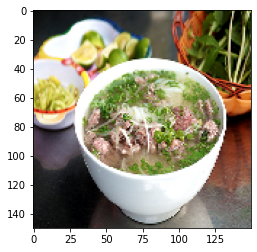

1/1 [==============================] - 0s 15ms/step
('Banh xeo', STT                                                          5
Ten mon an                                            Banh xeo
Thanh phan              Bot, nhan( thit, hai san,...), gia,...
Mui vi                            Thom thom, vua gion, vua beo
Cach thuong thuc    An kem voi rau cham kem nuoc mam chua ngot
Name: Banh xeo, dtype: object)


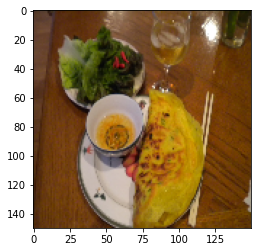

1/1 [==============================] - 0s 17ms/step
('Ca kho to', STT                                                          7
Ten mon an                                           Ca kho to
Thanh phan            Ca, thit ba chi, nuoc dua, gia vi an kem
Mui vi              Mui vi dac trung rieng va thom ngon cua ca
Cach thuong thuc                          An kem voi com trang
Name: Ca kho to, dtype: object)


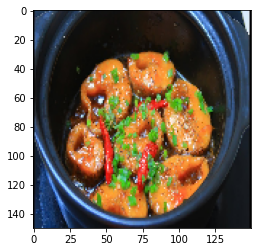

In [ ]:
import pandas as pd
url = '/content/Food.csv'
dataframe = pd.read_csv(url)
dataframe = dataframe.set_index(dataframe['Ten mon an'])
Test = "/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Test"
for i in os.listdir(Test):
  img=load_img(Test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Banh cuon', dataframe.loc['Banh cuon']
  if round(result[0][1])==1:
    prediction='Banh mi', dataframe.loc['Banh mi']
  if round(result[0][2])==1:
    prediction='Banh pia', dataframe.loc['Banh pia']
  if round(result[0][3])==1:
    prediction='Banh tet',dataframe.loc['Banh tet']
  if round(result[0][4])==1:
    prediction='Banh xeo',dataframe.loc['Banh xeo']
  if round(result[0][5])==1:
    prediction='Bun dau mam tom',dataframe.loc['Bun dau mam tom']
  if round(result[0][6])==1:
    prediction='Ca kho to',dataframe.loc['Ca kho to']
  if round(result[0][7])==1:
    prediction='Com tam', dataframe.loc['Com tam']
  if round(result[0][8])==1:
    prediction='Nem', dataframe.loc['Nem']
  if round(result[0][9])==1:
    prediction='Pho',dataframe.loc['Pho']
  print(prediction)
  plt.show()

In [ ]:
import pandas as pd
url = '/content/Food.csv'
dataframe = pd.read_csv(url)

dataframe.head(10)

,STT,Ten mon an,Thanh phan,Mui vi,Cach thuong thuc
0,1,Banh cuon,"Bot gao, thit heo, moc nhi, nam huong","Co mui thom cua bot, mem va dai","Cham vao nuoc cham pha loang voi giam, ot, toi"
1,2,Banh mi,"Banh mi, nhan( thit heo, ga, bo, trung, ca,......",Vi thom beo cua cac loai nhan hoa quyen voi nhau,An kem voi nuoc sot rieng doi voi tung loai nhan
2,3,Banh pia,"Vo banh lam bang bot mi, nhan dau xanh sau rie...","Vi ngot va beo cua nhan, mem cua vo banh",Thuong an kem khi uong tra
3,4,Banh tet,"Nep, nhan dau, thit heo","Ngot cua nep, mem cua nhan dau va beo cua thit...",An nhu binh thuong hoac co the chien len
4,5,Banh xeo,"Bot, nhan( thit, hai san,...), gia,...","Thom thom, vua gion, vua beo",An kem voi rau cham kem nuoc mam chua ngot
5,6,Bun dau mam tom,"Bun, dau, cha com, mam tom, nem chua, thit luo...","Mui thom cua cac loai cha va nem, mem va beo c...",Cham voi mam tom duoc pha kem voi tac va duong
6,7,Ca kho to,"Ca, thit ba chi, nuoc dua, gia vi an kem",Mui vi dac trung rieng va thom ngon cua ca,An kem voi com trang
7,8,Com tam,"Com, suon heo, bi heo, cha, trung op la",Mui vi hoa quyen cua cac loai do an kem,An kem voi nuoc mam toi ot pha keo
8,9,Nem,"Bi heo, thit nac heo, toi, tieu hat",Mui vi dac trung thom nong cua tieu,"An kem voi tuong, an song hoac chien len"
9,10,Pho,"Xuong ninh, gia vi nau pho, banh pho, rau an kem",Mui vi dac trung cua cac loai gia vi nau,Dung voi cac loai rau va gia vi an kem
